In [15]:
!pip install pyspark

In [16]:
import csv
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Creates a new Spark session
spark = SparkSession.builder.appName("Project").getOrCreate()

In [18]:
# Reads csv
energy_df = spark.read.csv("/content/drive/MyDrive/energy_dataset.csv", header = True, inferSchema=True)
weather_df = spark.read.csv("/content/drive/MyDrive/weather_features.csv", header = True, inferSchema=True)

energy_df.createOrReplaceTempView("Energy")
weather_df.createOrReplaceTempView("Weather")

In [36]:
# Joining two tables 
joined_df = energy_df.join(weather_df, energy_df.time == weather_df.dt_iso)
joined_df.show(1, vertical=True)

-RECORD 0-----------------------------------------------------------
 time                                        | 2015-01-01 00:00:... 
 generation_biomass                          | 447                  
 generation_fossil_brown_coal_lignite        | 329                  
 generation_fossil_coal_derived_gas          | 0                    
 generation_fossil_gas                       | 4844                 
 generation_fossil_hard_coal                 | 4821                 
 generation_fossil_oil                       | 162                  
 generation_fossil_oil_shale                 | 0                    
 generation_fossil_peat                      | 0                    
 generation_geothermal                       | 0                    
 generation_hydro_pumped_storage_aggregated  | null                 
 generation_hydro_pumped_storage_consumption | 863                  
 generation_hydro_run_of_river_and_poundage  | 1051                 
 generation_hydro_water_reservoir 

In [51]:
test_agg = joined_df.groupBy("city_name", "weather_main")\
    .agg({"time" : "count", "price_actual" : "avg"})\
    .withColumnRenamed('count(time)', 'count')\
    .withColumnRenamed('avg(price_actual)', 'avg_price')\
    .filter("count > 50")\
    .orderBy("city_name", "weather_main")
test_agg.show(100, False)

+----------+------------+------------------+-----+
|city_name |weather_main|avg_price         |count|
+----------+------------+------------------+-----+
| Barcelona|clear       |59.303128048780536|14760|
| Barcelona|clouds      |57.059775901669504|16109|
| Barcelona|drizzle     |56.17348837209297 |301  |
| Barcelona|fog         |61.49472972972973 |74   |
| Barcelona|mist        |55.98871331828442 |443  |
| Barcelona|rain        |55.62006062355667 |3464 |
| Barcelona|thunderstorm|62.423648208469096|307  |
|Bilbao    |clear       |60.56876611853771 |8453 |
|Bilbao    |clouds      |57.37253829583524 |16712|
|Bilbao    |drizzle     |60.67769072164943 |485  |
|Bilbao    |fog         |62.91078397212535 |1148 |
|Bilbao    |haze        |38.4368181818182  |66   |
|Bilbao    |mist        |59.97895819508952 |1507 |
|Bilbao    |rain        |54.97232583957808 |7206 |
|Bilbao    |snow        |55.178072289156624|166  |
|Bilbao    |thunderstorm|58.42384615384616 |208  |
|Madrid    |clear       |58.672

## Count of Each Cities

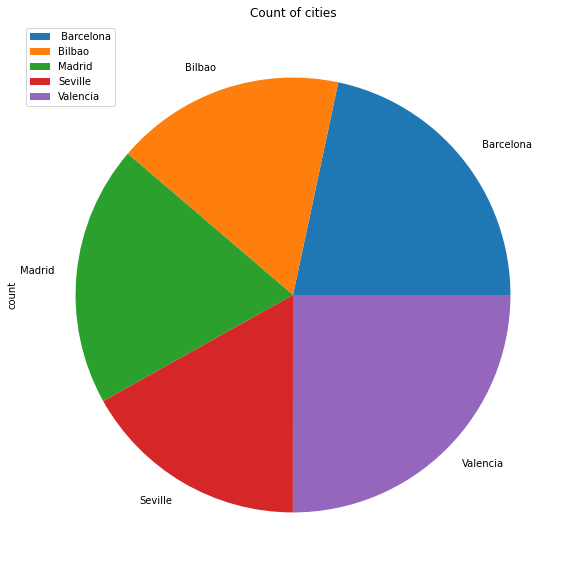

In [52]:
graph_df = test_agg.select('*').toPandas()
plt.rcParams["figure.figsize"] = 18,10
graph_df.groupby(['city_name']).mean().plot(kind='pie',y='count', title='Count of cities')

## Relationship between Average Price and weather condition


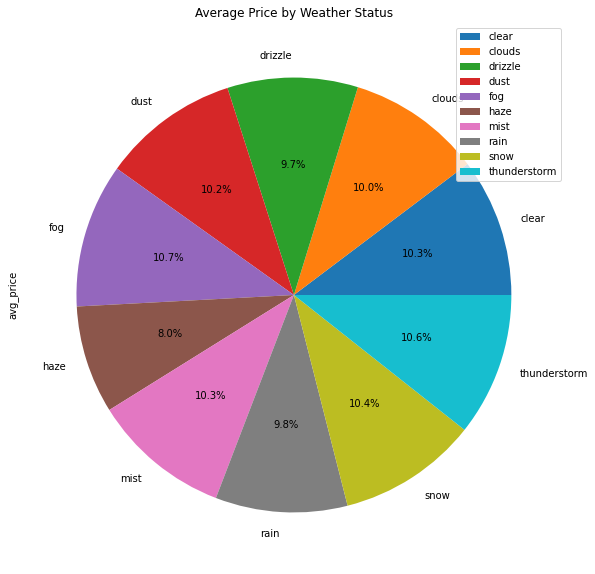

In [63]:

graph_df.groupby(['weather_main']).mean().plot(kind='pie',autopct='%1.1f%%',y='avg_price', title='Average Price by Weather Status')


**One can find out that fog thunder storm is reason for increse of electricity price**

## Average Price By city

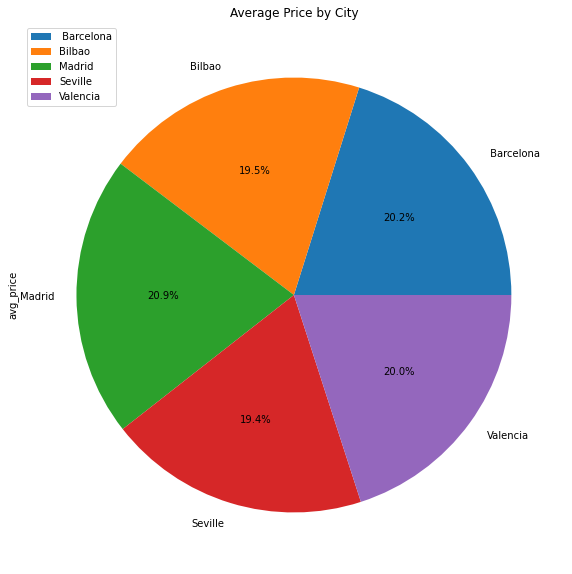

In [64]:
graph_df.groupby(['city_name']).mean().plot(kind='pie',autopct='%1.1f%%', y='avg_price', title='Average Price by City')


**Madrid raise the highest electricity price**

In [66]:
test_agg = joined_df.groupBy("city_name", "weather_main")\
    .agg({"time" : "count", "total_load_actual" : "avg"})\
    .withColumnRenamed('count(time)', 'count')\
    .withColumnRenamed('avg(total_load_actual)', 'avg_total_load')\
    .filter("count > 200")\
    .orderBy("city_name", "weather_main")
test_agg.show(100, False)

+----------+------------+-----+------------------+
|city_name |weather_main|count|avg_total_load    |
+----------+------------+-----+------------------+
| Barcelona|clear       |14760|28482.21504646903 |
| Barcelona|clouds      |16109|28994.82808325567 |
| Barcelona|drizzle     |301  |29672.35880398671 |
| Barcelona|mist        |443  |27499.279909706547|
| Barcelona|rain        |3464 |28335.97486275643 |
| Barcelona|thunderstorm|307  |28582.84039087948 |
|Bilbao    |clear       |8453 |28594.747010773055|
|Bilbao    |clouds      |16712|29005.899227591162|
|Bilbao    |drizzle     |485  |29667.263917525772|
|Bilbao    |fog         |1148 |27060.76306620209 |
|Bilbao    |mist        |1507 |27400.496350364963|
|Bilbao    |rain        |7206 |28509.527897592878|
|Bilbao    |thunderstorm|208  |29982.1875        |
|Madrid    |clear       |20356|28510.577259761976|
|Madrid    |clouds      |10643|28871.188205417606|
|Madrid    |drizzle     |637  |29550.177394034537|
|Madrid    |fog         |708  |

In [67]:
graph_df = test_agg.select('*').toPandas()
plt.rcParams["figure.figsize"] = 18,10

## Average Total load by city

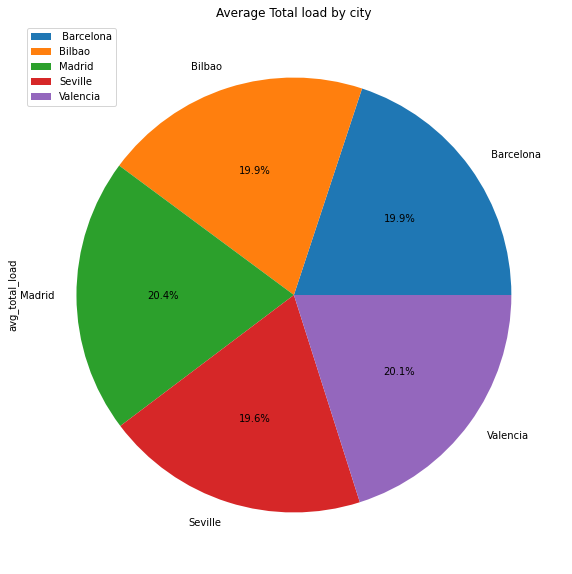

In [69]:
graph_df.groupby(['city_name']).mean().plot(kind='pie',y='avg_total_load',autopct='%1.1f%%', title='Average Total load by city')


**One can find out that Madrid is the biggest city in consuming electricity**

## Average Total load by weather status

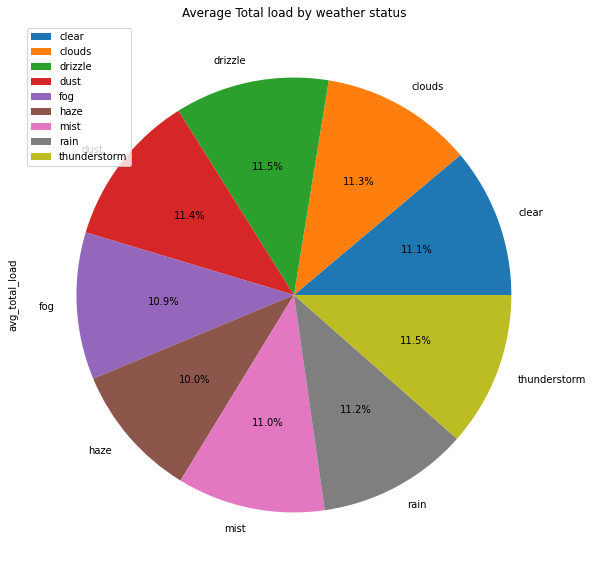

In [71]:
graph_df.groupby(['weather_main']).mean().plot(kind='pie',y='avg_total_load',autopct='%1.1f%%', title='Average Total load by weather status')


**Almost no difference between weather status, but drizzle is most related to it**

In [23]:
test_agg = joined_df.groupBy("wind_speed")\
    .agg({"time" : "count", "price_actual" : "avg"})\
    .withColumnRenamed('count(time)', 'count')\
    .withColumnRenamed('avg(price_actual)', 'avg_price')\
    .filter("count > 100")\
    .sort("wind_speed")
test_agg.show(100, False)

+----------+------------------+-----+
|wind_speed|avg_price         |count|
+----------+------------------+-----+
|0         |58.48246727961049 |18490|
|1         |59.43339504719147 |55201|
|2         |59.01993603102947 |34548|
|3         |58.04866671992347 |25036|
|4         |57.06761207885089 |18313|
|5         |55.986224428656946|11683|
|6         |54.2759935236974  |6794 |
|7         |51.87357766604923 |3779 |
|8         |48.61905970850969 |2127 |
|9         |46.72045927209707 |1154 |
|10        |43.99898686679175 |533  |
|11        |45.79360856269113 |327  |
|12        |48.36364532019704 |203  |
+----------+------------------+-----+



## Avg wind speed and Avg Price

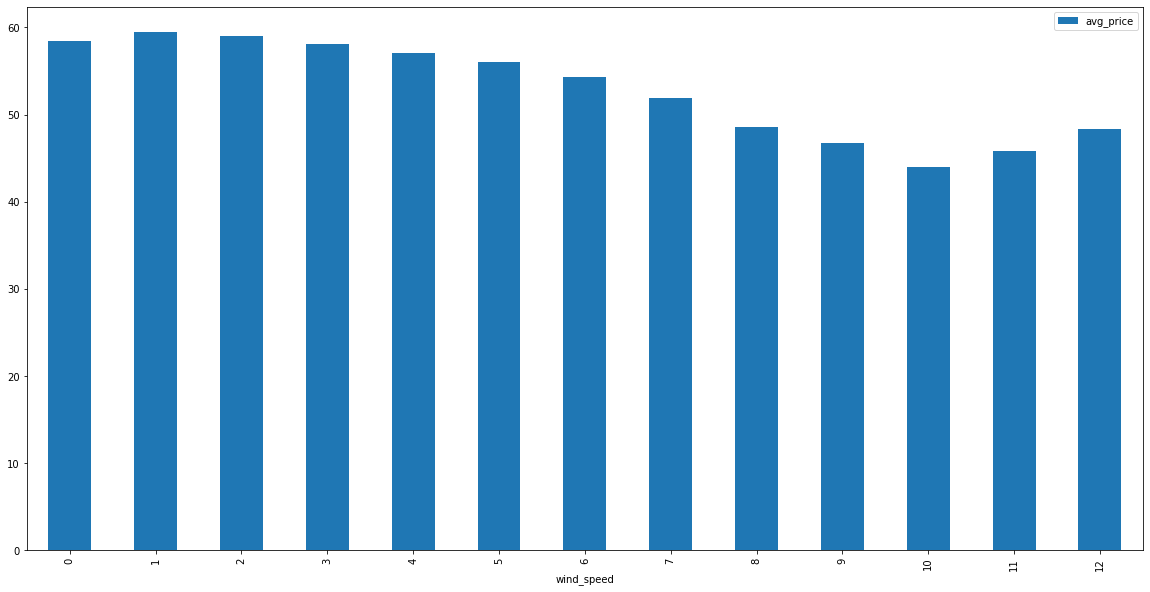

In [24]:
graph_df = test_agg.select('*').toPandas()
plt.rcParams["figure.figsize"] = 20,10
graph_df.plot.bar(x='wind_speed',
                  y='avg_price')

**There is trend that once wind speed is high the price tends to low**

In [25]:
test_agg = joined_df.groupBy("weather_main")\
    .agg({"time" : "count", "price_actual" : "avg"})\
    .withColumnRenamed('count(time)', 'count')\
    .withColumnRenamed('avg(price_actual)', 'avg_price')\
    .filter("count > 100")\
    .sort("weather_main")
test_agg.show(100, False)

+------------+------------------+-----+
|weather_main|avg_price         |count|
+------------+------------------+-----+
|clear       |58.733768156256176|82685|
|clouds      |57.230156344133476|68055|
|drizzle     |57.00519721577732 |1724 |
|dust        |58.58282420749277 |347  |
|fog         |61.98602154828405 |2506 |
|haze        |51.93441379310349 |435  |
|mist        |59.940174002047115|3908 |
|rain        |55.73944971536993 |17391|
|snow        |58.484518518518534|270  |
|thunderstorm|61.31607108549468 |1041 |
+------------+------------------+-----+



## Average price and weather Condition

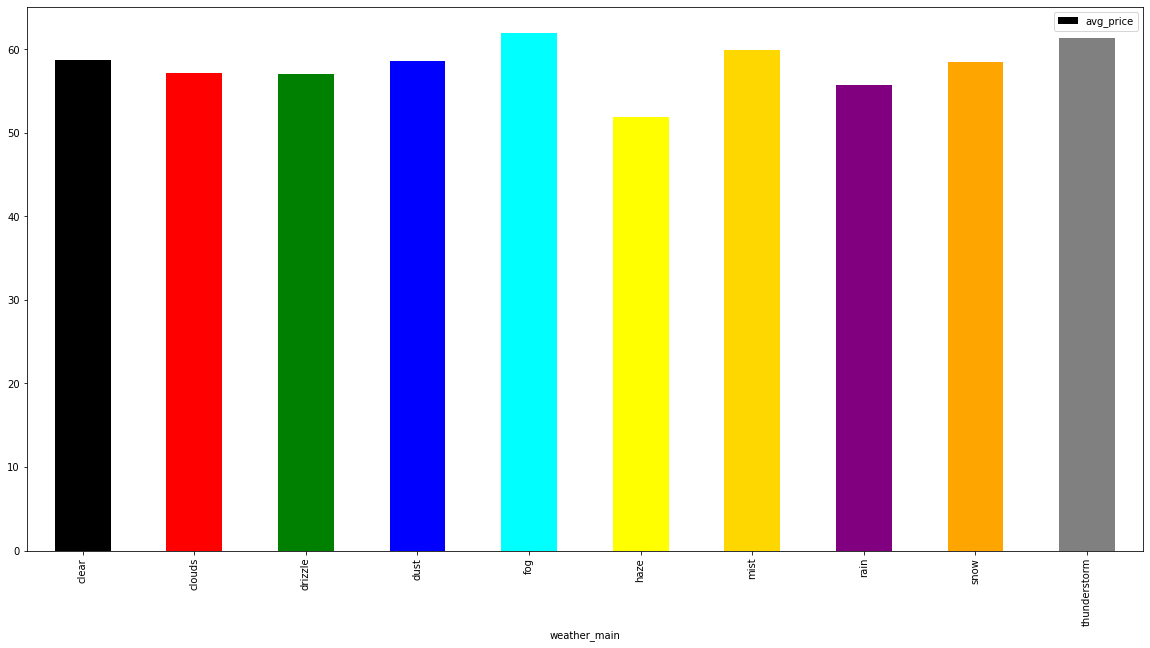

In [26]:
graph_df = test_agg.select('*').toPandas()
plt.rcParams["figure.figsize"] = 20,10
graph_df.plot.bar(x='weather_main',
                  y='avg_price', color=['black', 'red', 'green', 'blue', 'cyan',"yellow","gold", "purple", "orange", "grey"])

**Fog and mist Weather condition raise the electricity price**

# Yearly Analysis

In [27]:
test_agg = joined_df.groupBy(f.year('time'))\
    .agg({"price_actual" : "avg", \
          "price_day_ahead" : "avg", \
          "total_load_actual" : "avg",\
          "total_load_forecast" : "avg",\
          "generation_biomass" : "avg",\
          "generation_fossil_brown_coal_lignite" : "avg",\
          "generation_fossil_gas" : "avg",\
          "generation_fossil_hard_coal" : "avg",\
          "generation_fossil_oil" : "avg",\
          "generation_hydro_pumped_storage_consumption" : "avg",\
          "generation_hydro_run_of_river_and_poundage" : "avg",\
          "generation_hydro_water_reservoir" : "avg",\
          "generation_nuclear" : "avg",\
          "generation_other" : "avg",\
          "generation_other_renewable" : "avg",\
          "generation_solar" : "avg",\
          "generation_waste" : "avg",\
          "generation_wind_onshore" : "avg",\
         })\
    .withColumnRenamed('year(time)', 'year')\
    .orderBy('year')

test_agg.show(10)

+----+--------------------------+-----------------------------------------+------------------------+--------------------+-------------------------------------+----------------------+---------------------+---------------------+------------------+-------------------------------+-----------------------+------------------------------------------------+-----------------------+---------------------+--------------------------------+-----------------------------------------------+----------------------------+--------------------------+
|year|avg(generation_fossil_gas)|avg(generation_fossil_brown_coal_lignite)|avg(total_load_forecast)|avg(price_day_ahead)|avg(generation_hydro_water_reservoir)|avg(total_load_actual)|avg(generation_solar)|avg(generation_other)| avg(price_actual)|avg(generation_other_renewable)|avg(generation_nuclear)|avg(generation_hydro_pumped_storage_consumption)|avg(generation_biomass)|avg(generation_waste)|avg(generation_fossil_hard_coal)|avg(generation_hydro_run_of_river_and

## Average Total load by year

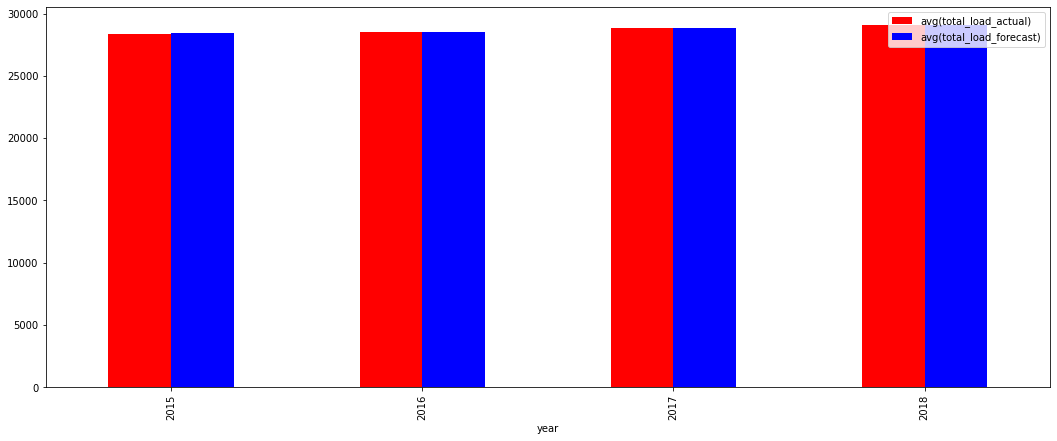

In [29]:
graph_df = test_agg.select('*').toPandas()
plt.rcParams["figure.figsize"] = 18,7
graph_df.plot.bar(x='year', y=['avg(total_load_actual)','avg(total_load_forecast)'], color=["red", "blue"],)


**There is no big difference total load and forecast, and total load seems to increase by year**

## Average Price by Year

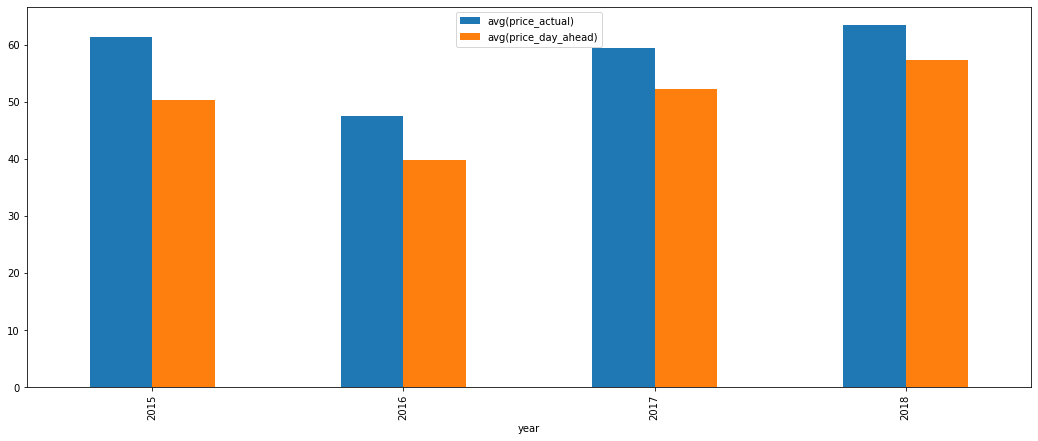

In [30]:
graph_df.plot.bar(x='year', y=['avg(price_actual)','avg(price_day_ahead)'], sharex=True)


**Price forecast seems lower than actual price and price seems fluctuate**

## Resources generation By Year

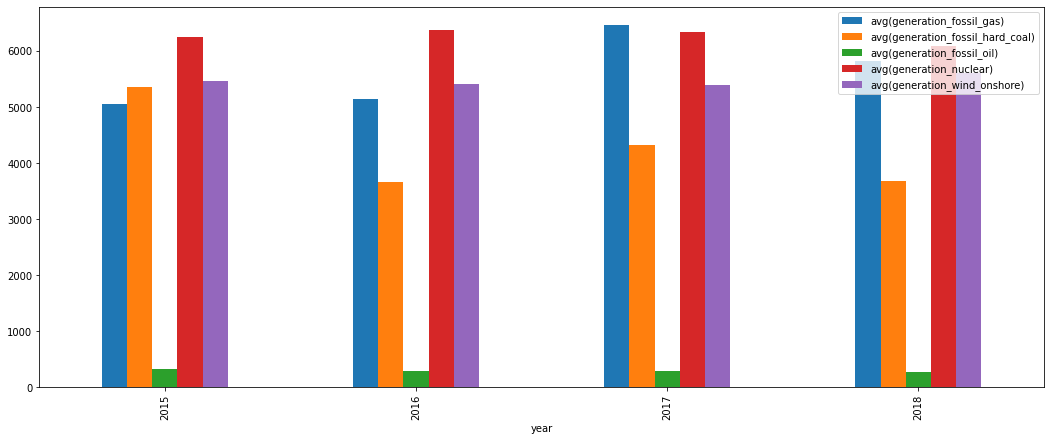

In [31]:
graph_df.plot.bar(x='year',
                  y=['avg(generation_fossil_gas)',
                     'avg(generation_fossil_hard_coal)',
                     'avg(generation_fossil_oil)',
                     'avg(generation_nuclear)',
                     'avg(generation_wind_onshore)'],
                  sharex=True)


## Additional Resource Generation by year

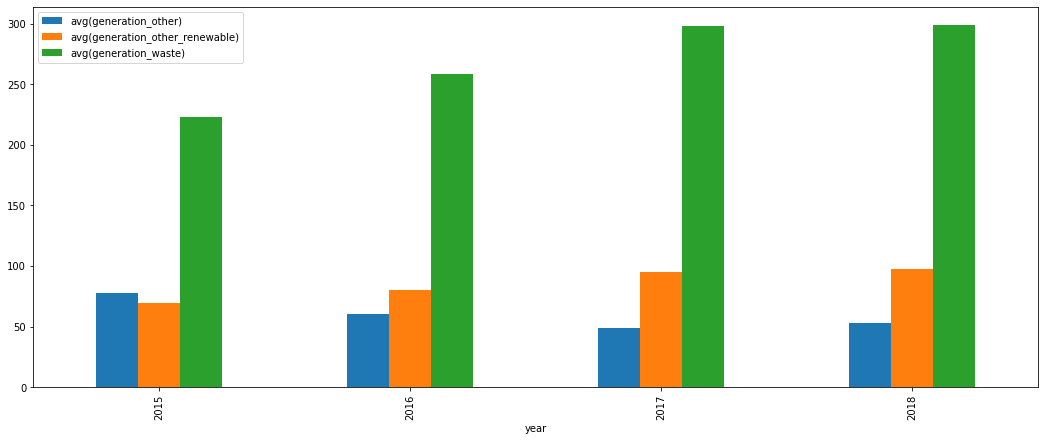

In [32]:
graph_df.plot.bar(x='year',
                  y=['avg(generation_other)',
                     'avg(generation_other_renewable)',
                     'avg(generation_waste)'],
                  sharex=True)

# Hourly Analysis

In [76]:
test_agg = joined_df.groupBy(f.hour('time'))\
    .agg({"total_load_actual" : "avg", \
          "price_actual" : "avg", \
          "temp" : "avg", \
          "humidity" : "avg",
          "wind_deg" : "avg"})\
    .withColumnRenamed('hour(time)', 'hour')\
    .orderBy('hour(time)')
test_agg.show(10,False)

+----+----------------------+------------------+------------------+-----------------+------------------+
|hour|avg(total_load_actual)|avg(wind_deg)     |avg(price_actual) |avg(humidity)    |avg(temp)         |
+----+----------------------+------------------+------------------+-----------------+------------------+
|0   |23951.38056680162     |172.93387314439946|50.59267071524979 |76.82712550607287|287.3518286184221 |
|1   |23151.25267578919     |177.10972804762548|48.76986605330808 |78.25071032336626|286.86320536801645|
|2   |22785.606415959024    |176.08316484701442|47.809578110257505|79.56287909421755|286.3548560115927 |
|3   |22846.36942760943     |175.85222072678332|47.83127994616416 |80.15275908479138|286.0387550933727 |
|4   |23843.10571620713     |174.71392064559515|50.34824613315387 |80.8028244788164 |285.7453692711837 |
|5   |25803.137810611148    |170.7979865771812 |53.87779731543619 |81.19892617449665|285.5679304572154 |
|6   |27999.24936352673     |165.58197378978338|58.4404

## Avg price by specific Hour

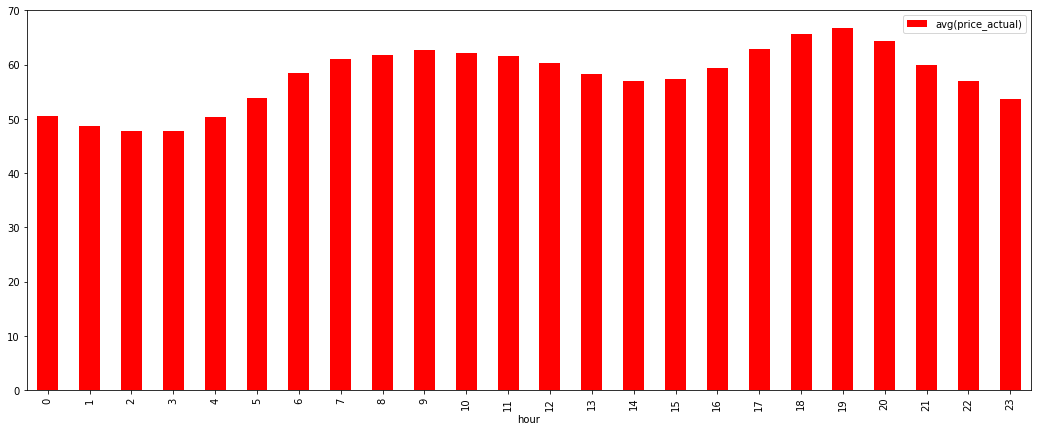

In [79]:
graph_df = test_agg.select('*').toPandas()
plt.rcParams["figure.figsize"] = 18,7
graph_df.plot.bar(x='hour', y='avg(price_actual)', color='red')


**Price seems to increase in after noon time and decrease in morning**

## Avg Total load by specific hour

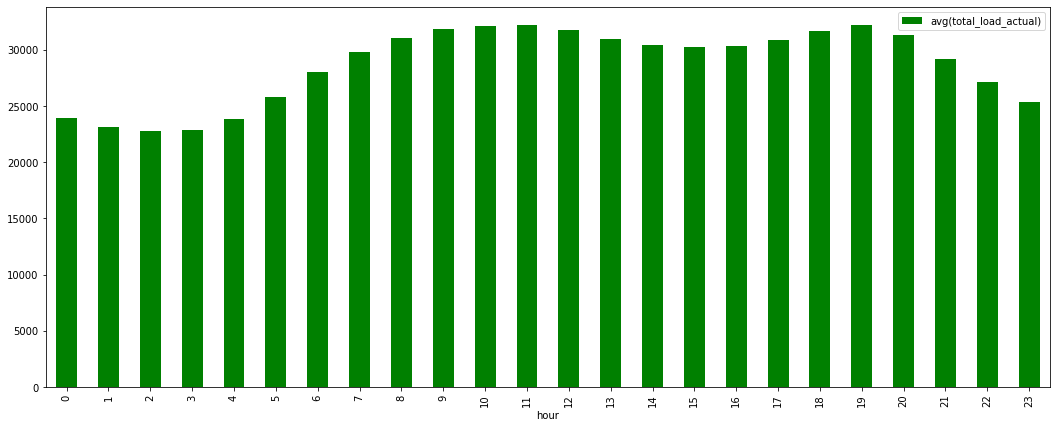

In [74]:
graph_df.plot.bar(x='hour', y='avg(total_load_actual)', color='green')

**Load seems to increase in after noon time and decrease in morning**

## Avg humidity by hour

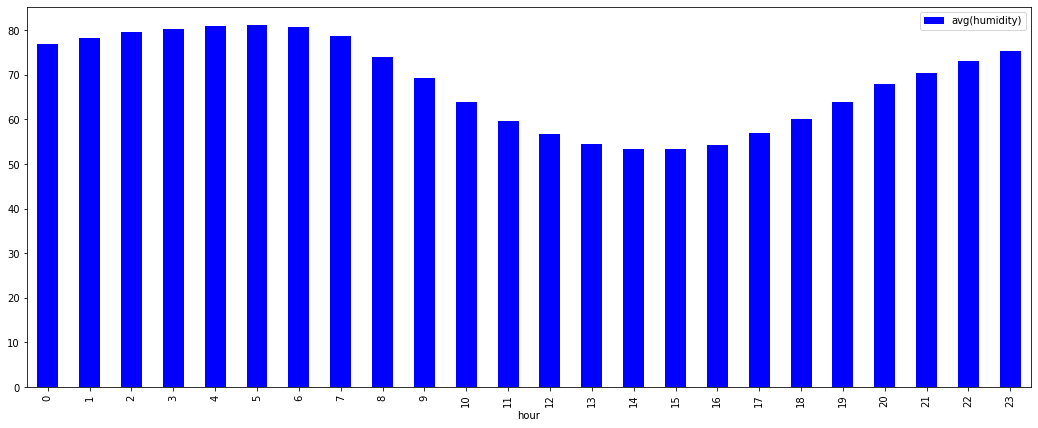

In [75]:
graph_df.plot.bar(x='hour', y='avg(humidity)', color='blue')


**humidity tends to decrease in afternoon and by relating this fact to the avg price by hour we can say that decrease of the humidity seems to increase the electricity price**

## Average wind degree by hour

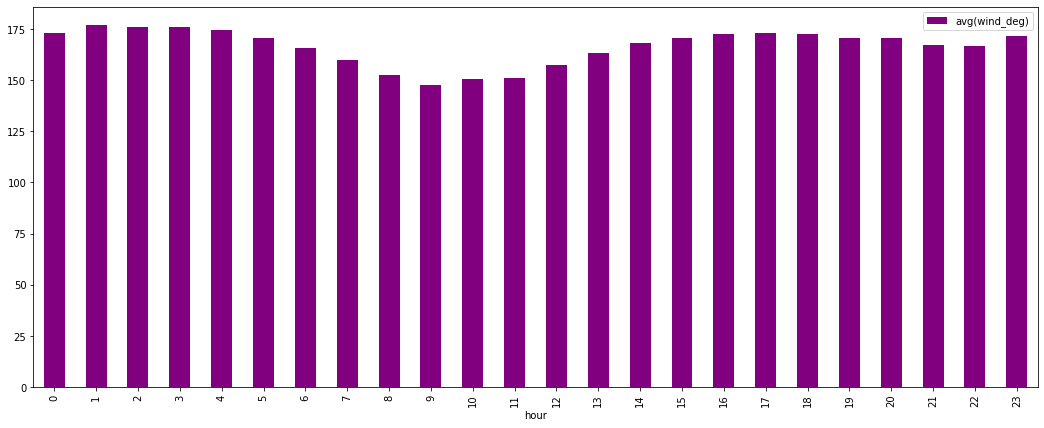

In [81]:
graph_df.plot.bar(x='hour', y='avg(wind_deg)', color='purple')

**wind degree is low at the morning but seems to increase after that time**